In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%autoreload
from recognizer.raw_samples import load_raw_suite
from sklearn.model_selection import train_test_split

import models.ML as ml
import models.utils as models_utils

import warnings
warnings.filterwarnings('ignore')

path = "data/unpacked"
path_train = "data/train"
path_test = "data/test"

window = 256
resample_f = 100


# train_test_split -> bad idea -> overfitting
# --------------------------------------------------

# suite = load_raw_suite(path)
# suite.resample(resample_f)
# print(suite)

# X, y = ml.load_data(suite, window_size=window)
# print(f'X: {X.shape}')
# print(f'y: {y.shape}')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


# train and test 
# --------------------------------------------------

train_suite = load_raw_suite(path_train)
test_suite = load_raw_suite(path_test)
train_suite.resample(resample_f)
test_suite.resample(resample_f)
print(train_suite)
print(test_suite)


X_train, y_train = ml.load_data(train_suite)
X_test, y_test = ml.load_data(test_suite)



data/train: length 82, resample to 0.1Hz
data/test: length 23, resample to 0.1Hz
Loading data...
Shuffling data...
Done

Done

Loading data...
Shuffling data...
Done

Done



------------------------------
| Train and test data shapes |
------------------------------
X_train shape:  (110346, 64)
y_train shape:  (110346,)
X_test shape:  (36098, 64)
y_test shape:  (36098,)


----------------------------
| Train / test split [%] |
----------------------------


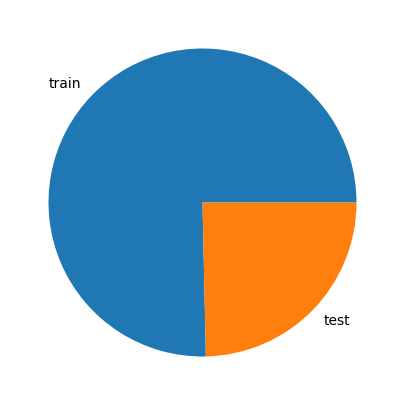



----------------------------
| Class distribution train |
----------------------------
chodz         40133
chodz_reka    29925
schod         20624
wchod         16226
upade          2235
siada          1203
Name: count, dtype: int64


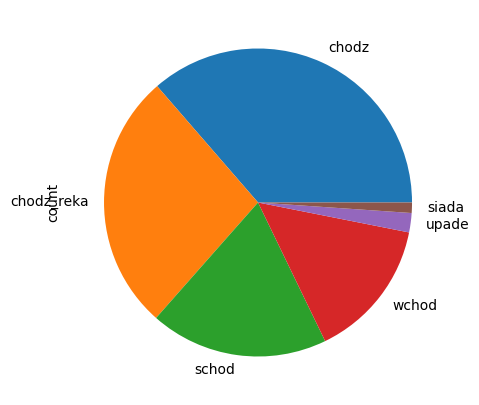



---------------------------
| Class distribution test |
---------------------------
chodz_reka    14148
chodz          7611
wchod          6323
schod          5957
upade          1246
siada           813
Name: count, dtype: int64


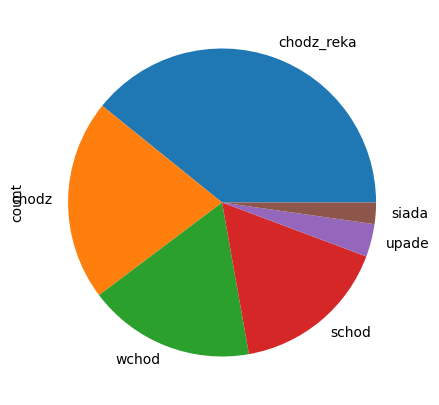

In [2]:

ml.train_test_info(X_train, y_train, X_test, y_test)

training the model..
Done 

Predicting test data
Done 

------------
| Accuracy |
------------
0.8842041110310821

--------------------
| Confusion Matrix |
--------------------
Normalized confusion matrix
[[0.83615819 0.         0.14768099 0.01616082 0.         0.        ]
 [0.00819904 0.99180096 0.         0.         0.         0.        ]
 [0.21492962 0.         0.72513048 0.05788392 0.00205599 0.        ]
 [0.01729058 0.         0.         0.92848749 0.         0.05422192]
 [0.         0.         0.         0.03075031 0.74907749 0.2201722 ]
 [0.06661316 0.         0.02889246 0.07383628 0.19101124 0.63964687]]


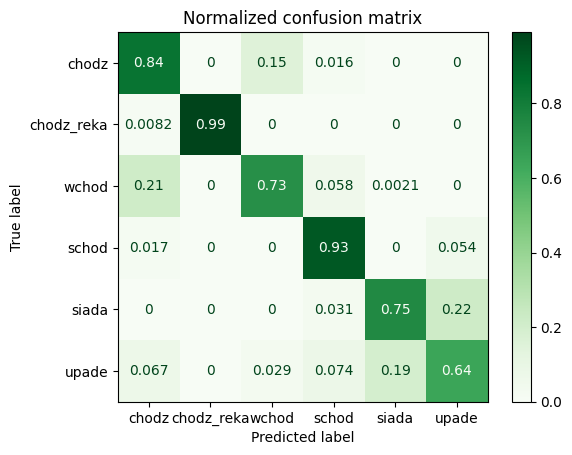

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      7611
           1       1.00      0.99      1.00     14148
           2       0.80      0.73      0.76      6323
           3       0.90      0.93      0.91      5957
           4       0.71      0.75      0.73       813
           5       0.61      0.64      0.63      1246

    accuracy                           0.88     36098
   macro avg       0.80      0.81      0.81     36098
weighted avg       0.88      0.88      0.88     36098



In [3]:
from sklearn import linear_model

# Create logistic regression
logistic = linear_model.LogisticRegression()
logistic_result = ml.perform_model(logistic, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#knn
# start Grid search 
parameters = {'n_neighbors': [1, 10, 11, 20, 30]}
clf_knn = KNeighborsClassifier(n_neighbors=6)

knn_grid = GridSearchCV(clf_knn, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
knn_grid_results = ml.perform_model(knn_grid, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)

training the model..
Fitting 3 folds for each of 5 candidates, totalling 15 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#svm
# start Grid search
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}
clf_svm = SVC()

svm_grid = GridSearchCV(clf_svm, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
svm_grid_results = ml.perform_model(svm_grid, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#dt
# start Grid search
parameters = {'max_depth': [10, 20, 30]}
clf_dt = DecisionTreeClassifier()

dt_grid = GridSearchCV(clf_dt, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
dt_grid_results = ml.perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#rf
# start Grid search
parameters = {'max_depth': [10, 20, 30], 'n_estimators': [20, 50, 100]}
clf_rf = RandomForestClassifier()

rf_grid = GridSearchCV(clf_rf, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
rf_grid_results = ml.perform_model(rf_grid, X_train, y_train, X_test, y_test, class_labels=models_utils.labels)